In [26]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [27]:
df = pd.read_csv('Live.csv')

In [28]:
df.shape

(7050, 16)

In [29]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [31]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [32]:
# Drop redundant columns
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [33]:
df.duplicated().sum()

51

In [34]:
# Drop duplicate rows based on all columns
df = df.drop_duplicates()

In [35]:
df.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

In [36]:
df2=df.copy()
facebook=df.copy()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         6999 non-null   object
 1   status_type       6999 non-null   object
 2   status_published  6999 non-null   object
 3   num_reactions     6999 non-null   int64 
 4   num_comments      6999 non-null   int64 
 5   num_shares        6999 non-null   int64 
 6   num_likes         6999 non-null   int64 
 7   num_loves         6999 non-null   int64 
 8   num_wows          6999 non-null   int64 
 9   num_hahas         6999 non-null   int64 
 10  num_sads          6999 non-null   int64 
 11  num_angrys        6999 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 710.8+ KB


In [38]:
# statistical summary of numerical variables
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [39]:
len(df['status_id'].unique())

6997

In [40]:
len(df['status_published'].unique())

6913

## EDA

In [41]:
# Convert the 'status_published' column to a datetime format
facebook['status_published'] = pd.to_datetime(facebook['status_published'])

# Calculate the total reactions for each post
facebook['total_reactions'] = facebook['num_likes'] + facebook['num_loves'] + facebook['num_wows'] + facebook['num_hahas'] + facebook['num_sads'] + facebook['num_angrys']

# Find the row with the highest total reactions
max_reactions_row = facebook[facebook['total_reactions'] == facebook['total_reactions'].max()]

# Get the type of content and the corresponding status_id
highest_reactions_content_type = max_reactions_row['status_type'].values[0]
highest_reactions_status_id = max_reactions_row['status_id'].values[0]

print("Status with the highest reactions:")
print(f"Status ID: {highest_reactions_status_id}")
print(f"Content Type: {highest_reactions_content_type}")



Status with the highest reactions:
Status ID: 246675545449582_735701483213650
Content Type: photo


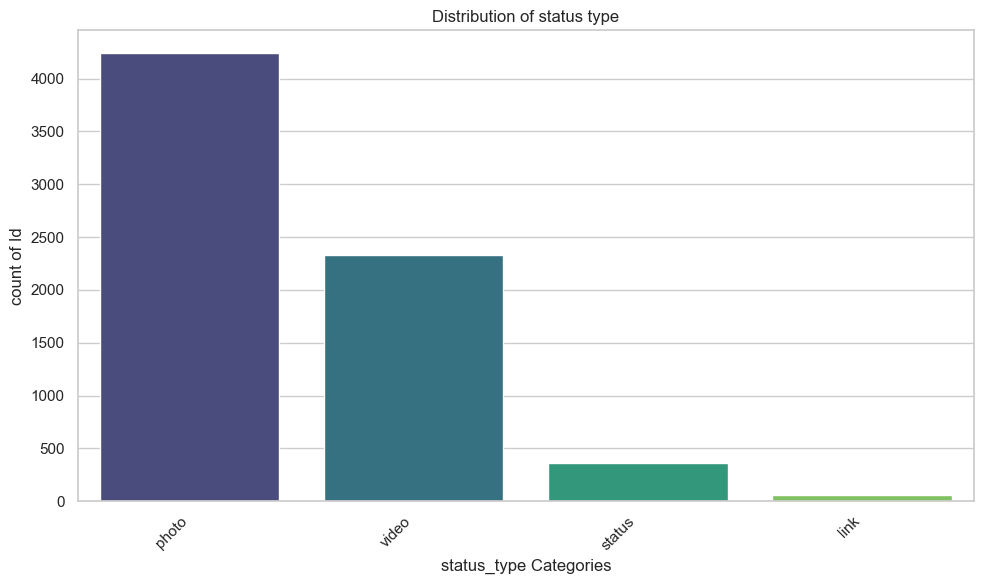

In [42]:

status_type = facebook['status_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_type.index, y=status_type.values, palette='viridis')
plt.xlabel('status_type Categories')
plt.ylabel('count of Id')
plt.title('Distribution of status type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

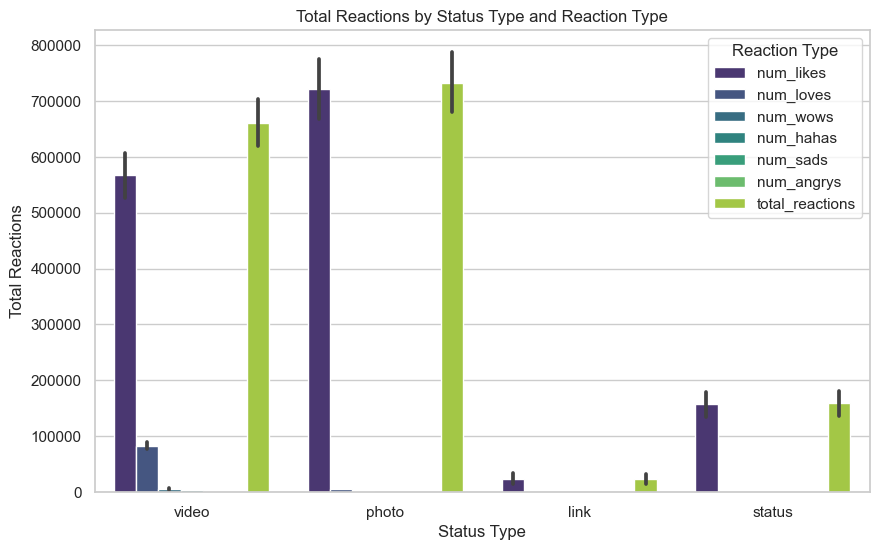

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is already loaded into a DataFrame (replace 'df' with your actual DataFrame)

# Melt the DataFrame to convert it to long format
data = facebook.melt(id_vars=['status_type', 'status_id', 'status_published', 'num_reactions', 'num_comments', 'num_shares'],
             var_name='reaction', value_name='count')

# Create a stacked bar chart using the original DataFrame
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Specify the DataFrame and columns to use for the plot
sns.barplot(data=data, x='status_type', y='count', hue='reaction', palette="viridis", estimator=sum)

plt.xlabel('Status Type')
plt.ylabel('Total Reactions')
plt.title('Total Reactions by Status Type and Reaction Type')
plt.legend(title='Reaction Type')

plt.show()


In [44]:
# Convert 'status_published' to datetime
facebook['status_published'] = pd.to_datetime(facebook['status_published'])

# Extract the year from the 'status_published' column
facebook['Year'] = facebook['status_published'].dt.year

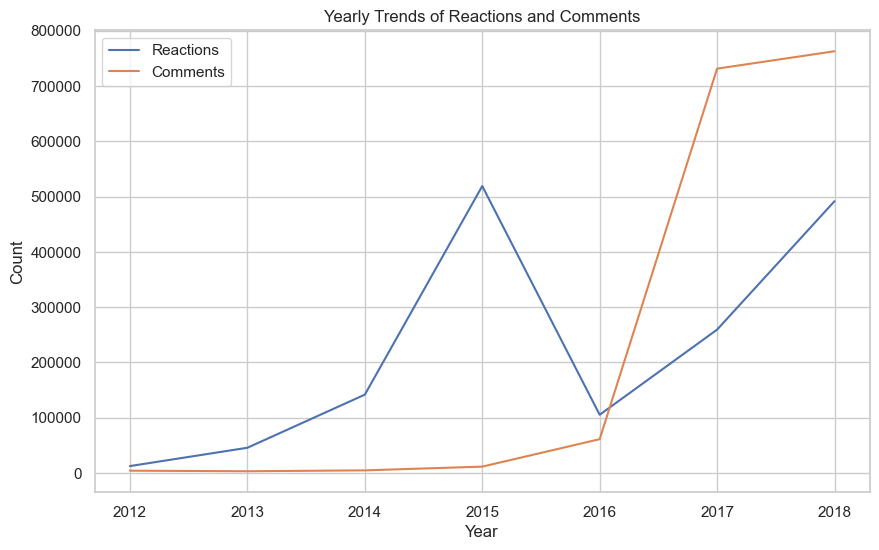

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by year and sum reactions and comments
yearly_data = facebook.groupby('Year')[['num_reactions', 'num_comments']].sum()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data['num_reactions'], label='Reactions')
plt.plot(yearly_data.index, yearly_data['num_comments'], label='Comments')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Trends of Reactions and Comments')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
facebook['negative_reactions'] = facebook[['num_hahas', 'num_sads', 'num_angrys']].sum(axis=1)


In [47]:
facebook['positive_reactions'] = facebook[['num_likes', 'num_loves', 'num_wows']].sum(axis=1)

<Axes: title={'center': 'Number of Comments v.s Negative Reactions'}, xlabel='num_comments', ylabel='negative_reactions'>

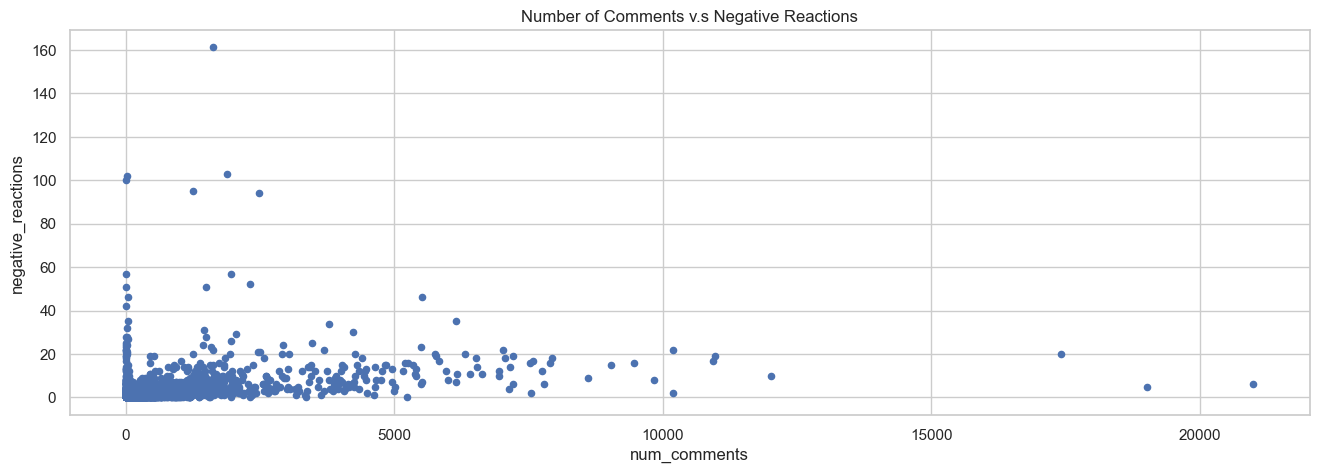

In [48]:
facebook.plot.scatter(x='num_comments',
                      y='negative_reactions',
                     figsize=(16,5),
                     title="Number of Comments v.s Negative Reactions")

<Axes: title={'center': 'Number of Comments v.s positive Reactions'}, xlabel='num_comments', ylabel='positive_reactions'>

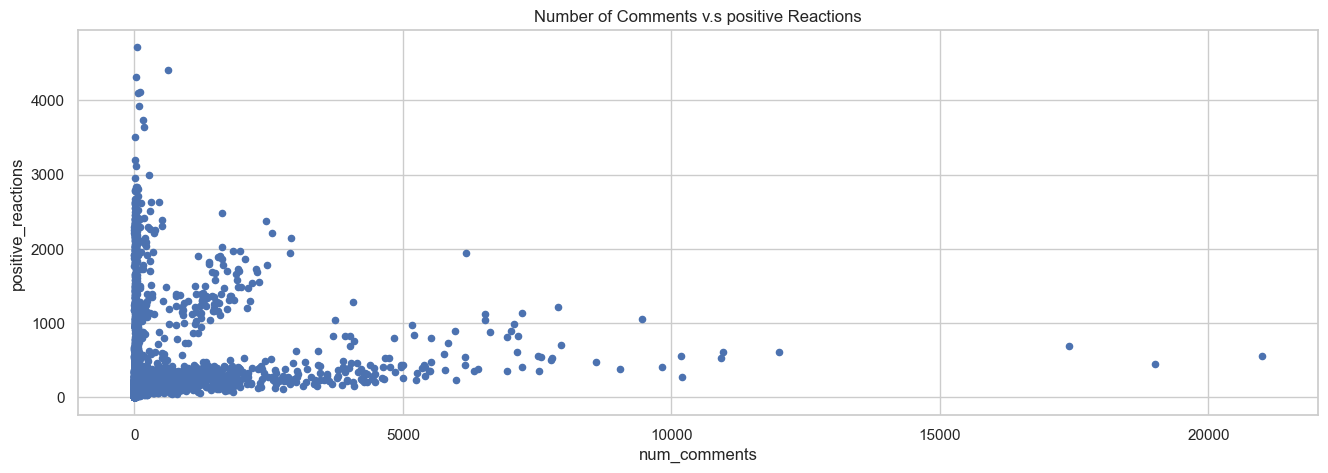

In [49]:
facebook.plot.scatter(x='num_comments',
                      y='positive_reactions',
                     figsize=(16,5),
                     title="Number of Comments v.s positive Reactions")

 Comments to positive responses are much higher than comments to negative. 

In [50]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [51]:
df = df.replace({'status_type' : { 'video' : 0, 'photo' : 2, 'link' : 3, 'status' : 4}})
df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,0,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,2,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,0,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,2,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,2,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [52]:

df.drop(['status_id', 'status_published'], axis=1, inplace=True)

# Now create a new DataFrame 'df1' with the modified data
df1 = df.copy()

In [53]:
df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,2,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,2,111,0,0,111,0,0,0,0,0
4,2,213,0,0,204,9,0,0,0,0


In [54]:
cols = df1.columns

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

df1 = ms.fit_transform(df1)

In [55]:
df1 = pd.DataFrame(df1, columns=[cols])

In [56]:
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.5,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.5,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.5,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
6994,0.5,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
6995,0.5,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
6996,0.5,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
6997,0.5,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


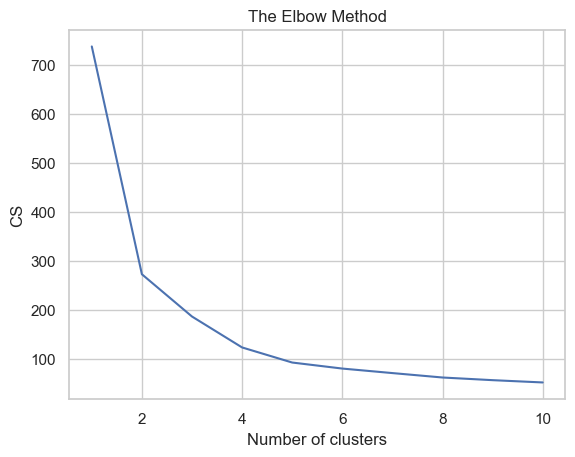

In [57]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [58]:
from sklearn.cluster import KMeans

# Based on the Elbow Method, choose the optimal number of clusters (let's say k=3)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df1)


/Users/da_m1_46/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
cluster_labels = kmeans.predict(df1)

In [60]:
cluster_labels

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [61]:
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(df1, cluster_labels)
print('Silhouette score:', silhouette_score)

Silhouette score: 0.7366535125897157


In [62]:
# Add the cluster labels to the original dataset
df1['cluster'] = clusters

In [63]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [64]:
# Add the cluster labels to the original dataset
df1['cluster'] = clusters

In [65]:
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,0.0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,1
1,0.5,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0
2,0.0,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,1
3,0.5,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0
4,0.5,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
6994,0.5,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0
6995,0.5,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0
6996,0.5,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0
6997,0.5,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0


In [66]:
df2['cluster'] = cluster_labels

In [67]:
cluster_0=df2[df2['cluster']==0]
cluster_0

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,0
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,0
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,0


In [68]:
cluster_1=df2[df2['cluster']==1]
cluster_1

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,1
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,1
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,1
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,1
15,246675545449582_1628507150599741,video,4/1/2018 5:16,332,100,30,303,23,1,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6974,1050855161656896_1341548359254240,video,7/17/2017 8:01,300,5404,219,245,44,1,7,2,1,1
6977,1050855161656896_1339706342771775,video,7/15/2017 10:52,253,4432,167,209,29,5,5,5,0,1
6978,1050855161656896_1339390826136660,video,7/15/2017 4:42,324,4472,232,278,33,5,5,3,0,1
6992,1050855161656896_1215941701814907,video,3/3/2017 9:39,36,240,20,33,2,1,0,0,0,1


<Axes: xlabel='num_comments', ylabel='num_likes'>

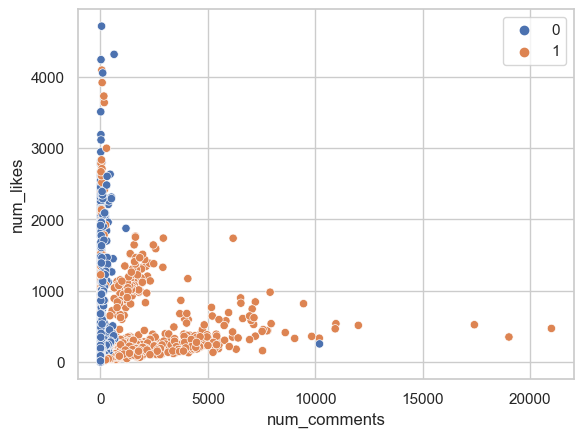

In [69]:
import seaborn as sns

sns.scatterplot(data = df2, x = 'num_comments', y = 'num_likes', hue = kmeans.labels_)

Cluster 0:Most they post photos and they get high likes and less comments.

Cluster 1:Most people they post videos and statuses they get more comments and more likes.  And those people who get less like also get less comments.

<Axes: xlabel='num_likes', ylabel='num_shares'>

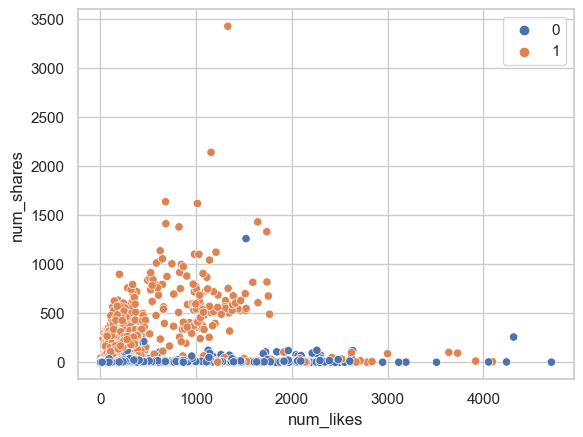

In [70]:
sns.scatterplot(data = df2, x ='num_likes', y ='num_shares', hue = kmeans.labels_)

Cluster 0:Most they post photos and they get high likes and less shares.

Cluster 1:Most people they post videos and statuses they get more shares and more likes.  And those people who get less like also get less shares.

## Reccomendations

1. If you have business and want to  share your work with people it's safer to share it in a form of videos.
2. If you have personal account and you are interested in  getting more likes you should use photos.